### 4.4 Univariate Non-linear transformations
- log, exp, sin 함수를 사용한 특성 변환
  - 선형 모델 또는 신경망의 성능을 올리는 데 활용
  - 데이터셋에 주기적인 패턴이 있을 때 적합
  - 정수 카운트 데이터에 적합
    - 예. "사용자가 얼마나 자주 로그인하는가?" 같은 특성
    - 카운트에는 음수가 없으며, 임의의 통계 패턴을 따르는 경우가 많음
    - 일반적으로 정규 분포를 따를 때 모델 성능이 좋음

- 인위적으로 카운트 데이터 만들기
  - 1) 표준 정규 분포를 따르는 랜덤 데이터 만들기
  - 2) 해당 랜덤 데이터 \* 10 을 평균으로 지니는 Poisson 분포를 따르는 데이터 만들기

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
print("X_org.shape:", X_org.shape)
print("w.shape:", w.shape)
print()

X = rnd.poisson(lam = 10 * np.exp(X_org))
y = np.dot(X_org, w)
print("X.shape:", X.shape)
print("y.shape:", y.shape)
print()

print("X_org[:10, 0]:", X_org[:10, 0])
print("X[:10, 0]", X[:10, 0])
print("y[:10]", y[:10])

X_org.shape: (1000, 3)
w.shape: (3,)

X.shape: (1000, 3)
y.shape: (1000,)

X_org[:10, 0]: [ 1.764  2.241  0.95   0.411  0.761  0.334  0.313  0.654  2.27  -0.187]
X[:10, 0] [ 56  81  25  20  27  18  12  21 109   7]
y[:10] [ 2.926  4.744  1.439  0.57   1.231  1.405  0.305  1.618  2.784  0.405]


In [3]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


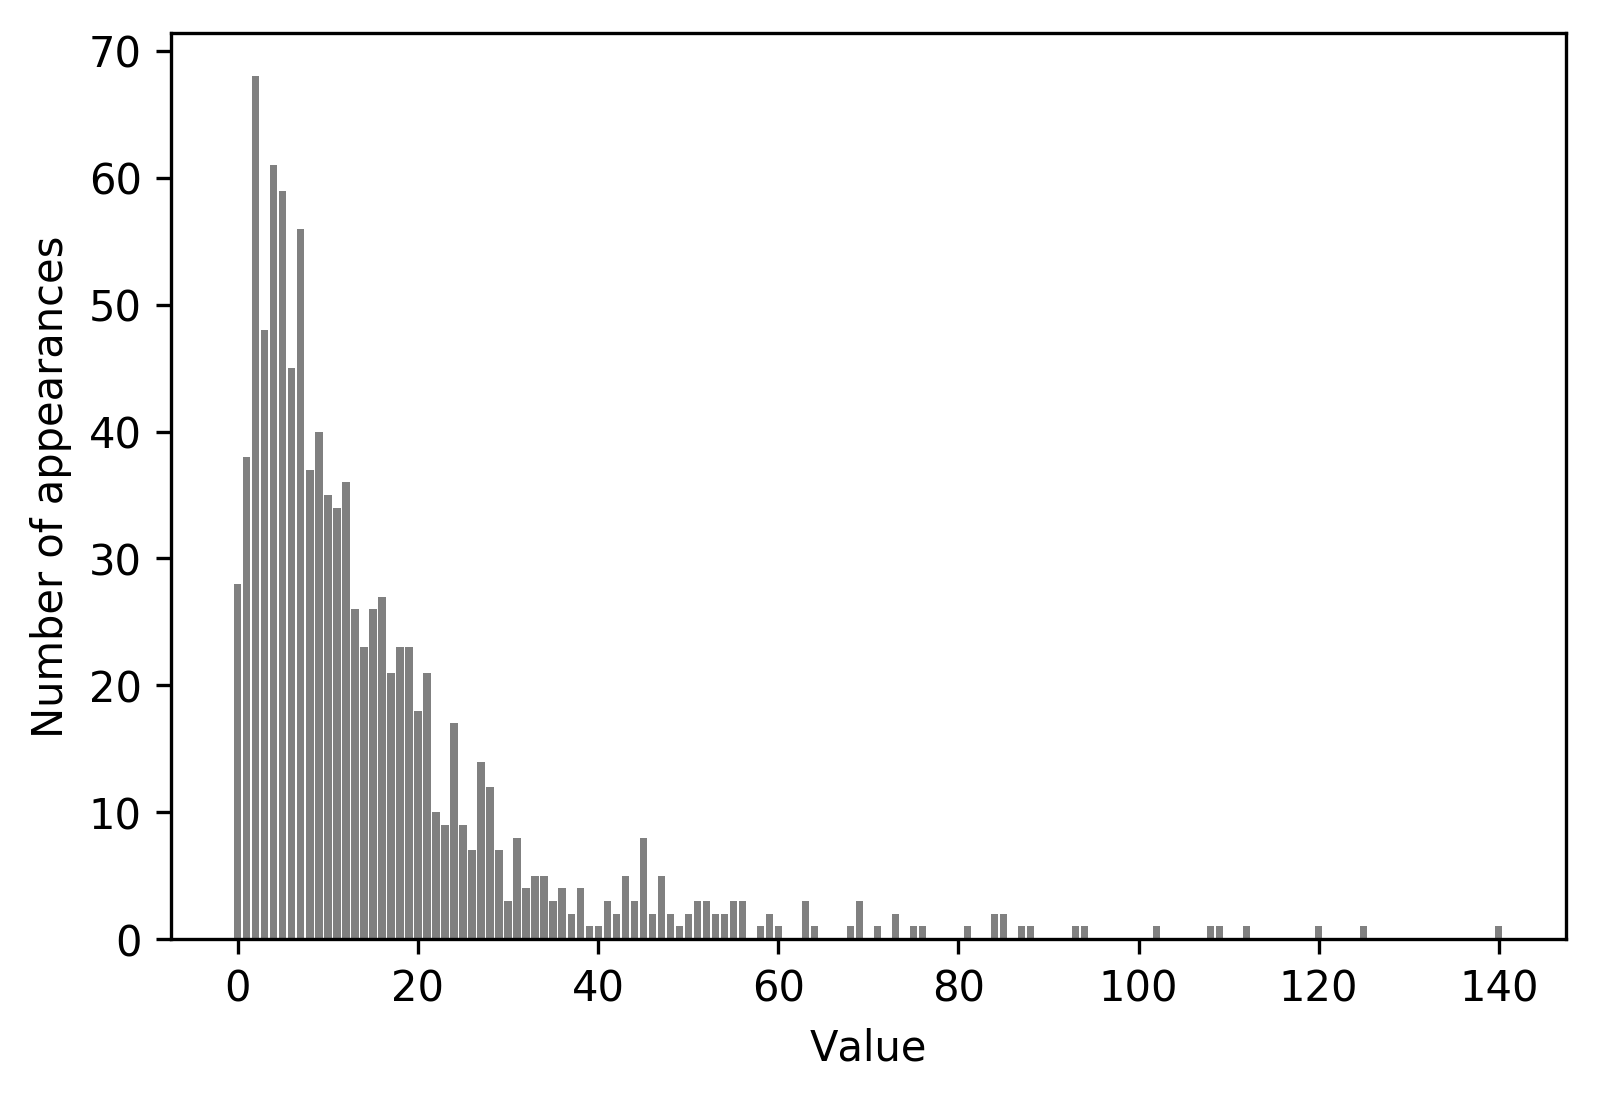

In [4]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [7]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

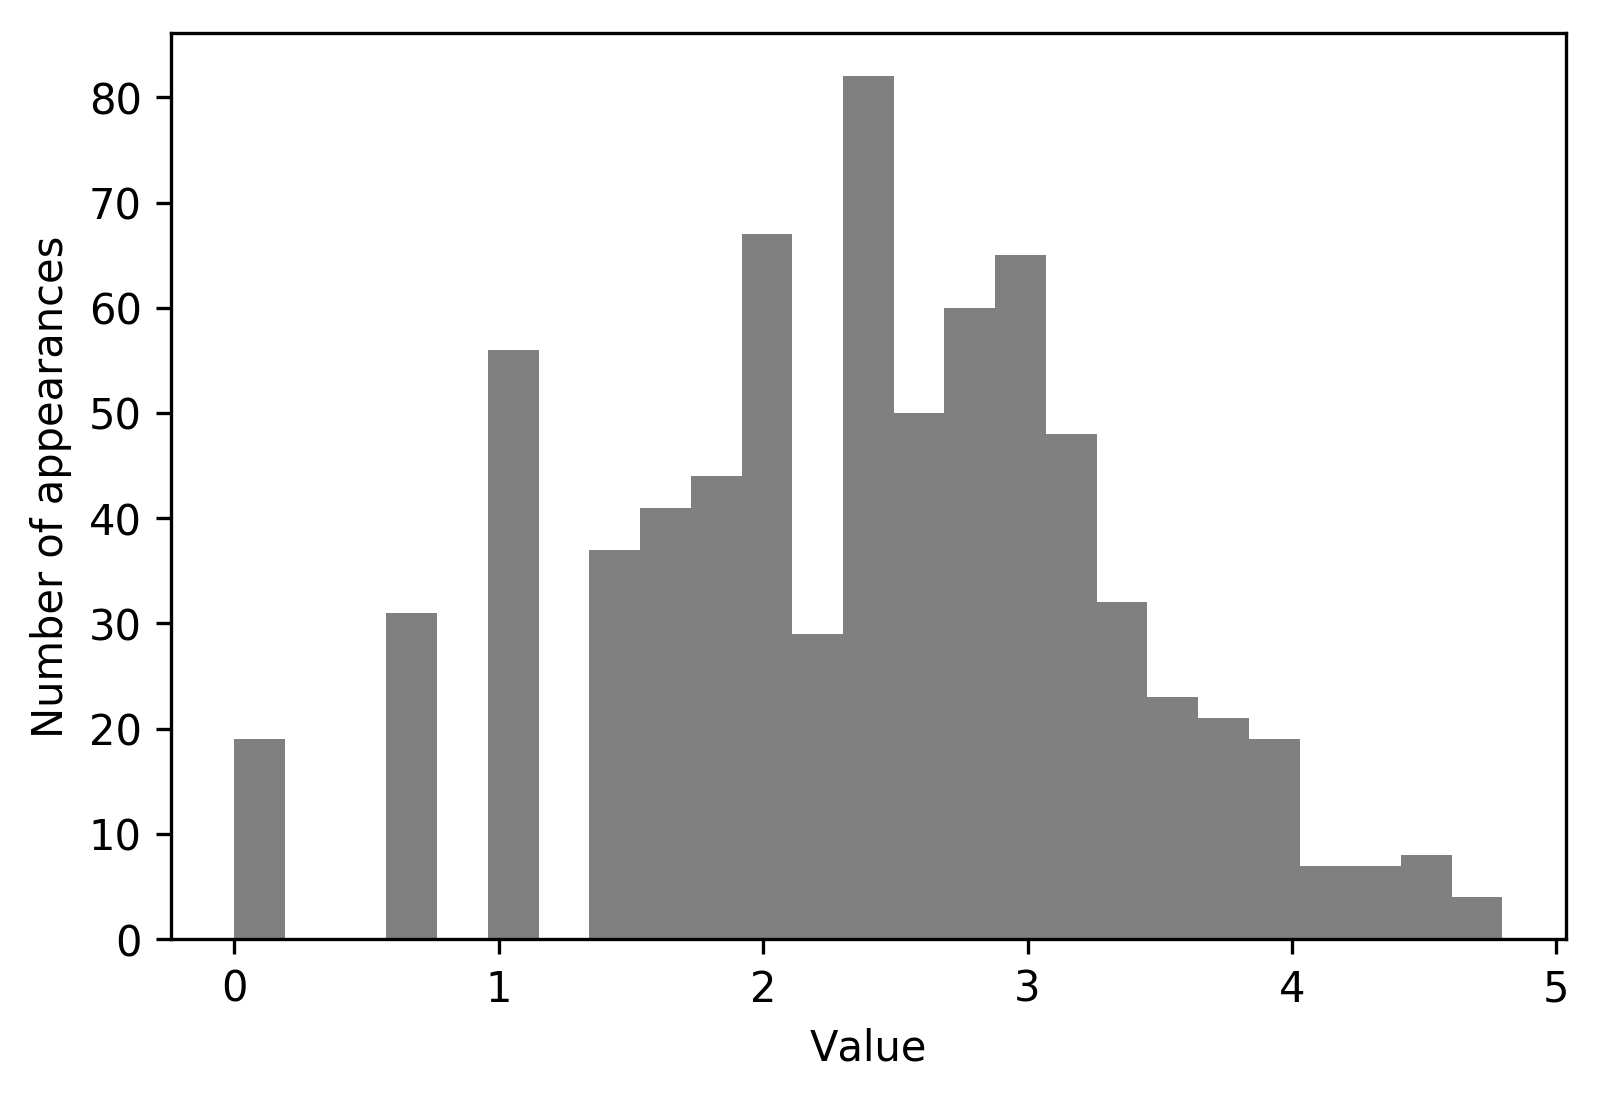

In [8]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.show()

- 정규분포에 가까운 데이터를 사용하여 Ridge 모델 적용
  - 성능개선!!!

In [9]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


- 원 데이터 집합에 대하여 구간 분할, 다항식 변환, 비선형 변환 등이 모델 성능에 영향을 주는 정도
  - 선형 모델, 나이브 베이즈 모델: 영향 큼
  - SVM, 최근접 이웃, 신경망: 영향 중간
  - 트리 기반 모델: 영향 거의 없음